In [1]:
import numpy as np
import pandas as pd
revenue_train=pd.read_csv('data/patient_monthwise_revenue_train.csv')
diagnosis_train=pd.read_csv('data/physio_diagnosis_train.csv')
classified_train=pd.read_csv('data/patient_train_classified.csv')
appts_train=pd.read_csv('data/physio_appts_train.csv')

/Users/admin/softs/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
revenue_test=pd.read_csv('data/patient_monthwise_revenue_test.csv')
diagnosis_test=pd.read_csv('data/physio_diagnosis_test.csv')
submission=pd.read_csv('data/Submission.csv')

/Users/admin/softs/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
revenue_train.head(1)

,patient_id,visit_month_year,service_id,visits_count,city,revenue,ref_type,ref_name,ref_source,service_name,...,FVS,approx_age,gender,LVD,brand,visits_required,diagnosis,avg_nps,Unnamed: 20,Unnamed: 21
0,10020,04/15,2,1,Chennai,500.0,B2C,None,Direct Organic,P,...,P,62,male,21/04/2015,Portea,1,Post Operative condition of Cardiac Valve repl...,\N,NaN,NaN


In [6]:
diagnosis_train.rename(columns={'patientId': 'patient_id'}, inplace=True)
diagnosis_train.head(1)

,patient_id,diagnosis,Service,Appt_id,AGE,gender,LVD,Unnamed: 7,Unnamed: 8
0,10020,Post Operative condition of Cardiac Valve repl...,physiotherapy,432155,62,male,21/04/2015,NaN,NaN


In [7]:
train_data=pd.merge(revenue_train,diagnosis_train,how='left',on='patient_id')

In [8]:
train_data.head(3)

,patient_id,visit_month_year,service_id,visits_count,city,revenue,ref_type,ref_name,ref_source,service_name,...,Unnamed: 20,Unnamed: 21,diagnosis_y,Service,Appt_id,AGE,gender_y,LVD_y,Unnamed: 7,Unnamed: 8
0,10020,04/15,2,1,Chennai,500.0,B2C,None,Direct Organic,P,...,NaN,NaN,Post Operative condition of Cardiac Valve repl...,physiotherapy,432155,62,male,21/04/2015,NaN,NaN
1,10293,04/17,2,7,Mumbai,4900.0,B2C,Facebook,Digital + ATL,P,...,NaN,NaN,Rheumatoid arthritis,physiotherapy,2617156,42,female,25/04/2017,NaN,NaN
2,10381,07/15,2,1,NCR,500.0,B2C,None,Direct Organic,P,...,NaN,NaN,frozen shoulder,physiotherapy,675822,67,male,11/09/2015,NaN,NaN


In [9]:
classified_train.head(2)

,PID,Bucket,Revenue
0,400061,Med,1200.0
1,25535,High,25150.0


In [10]:
classified_train.rename(columns={'PID': 'patient_id'}, inplace=True)
classified_train.head(2)

,patient_id,Bucket,Revenue
0,400061,Med,1200.0
1,25535,High,25150.0


In [11]:
train_data=pd.merge(train_data,classified_train,how='left',on='patient_id')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83307 entries, 0 to 83306
Data columns (total 32 columns):
patient_id          83307 non-null int64
visit_month_year    83307 non-null object
service_id          83307 non-null int64
visits_count        83307 non-null int64
city                83307 non-null object
revenue             83307 non-null float64
ref_type            83307 non-null object
ref_name            83307 non-null object
ref_source          83307 non-null object
service_name        82084 non-null object
FVD                 83307 non-null object
FVM                 83307 non-null object
FVS                 83307 non-null object
approx_age          83307 non-null object
gender_x            83274 non-null object
LVD_x               83307 non-null object
brand               83307 non-null object
visits_required     83307 non-null int64
diagnosis_x         81574 non-null object
avg_nps             83307 non-null object
Unnamed: 20         40 non-null object
Unnamed: 21    

In [23]:
train_data.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 20','Unnamed: 21'],axis = 1, inplace=True)

In [24]:
train_data.head(3)

,patient_id,visit_month_year,service_id,visits_count,city,revenue,ref_type,ref_name,ref_source,service_name,...,diagnosis_x,avg_nps,diagnosis_y,Service,Appt_id,AGE,gender_y,LVD_y,Bucket,Revenue
0,10020,04/15,2,1,Chennai,500.0,B2C,None,Direct Organic,P,...,Post Operative condition of Cardiac Valve repl...,\N,Post Operative condition of Cardiac Valve repl...,physiotherapy,432155,62,male,21/04/2015,Low,500.0
1,10293,04/17,2,7,Mumbai,4900.0,B2C,Facebook,Digital + ATL,P,...,Rheumatoid arthritis,9,Rheumatoid arthritis,physiotherapy,2617156,42,female,25/04/2017,Med,4900.0
2,10381,07/15,2,1,NCR,500.0,B2C,None,Direct Organic,P,...,frozen shoulder,8,frozen shoulder,physiotherapy,675822,67,male,11/09/2015,High,12250.0


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83307 entries, 0 to 83306
Data columns (total 28 columns):
patient_id          83307 non-null int64
visit_month_year    83307 non-null object
service_id          83307 non-null int64
visits_count        83307 non-null int64
city                83307 non-null object
revenue             83307 non-null float64
ref_type            83307 non-null object
ref_name            83307 non-null object
ref_source          83307 non-null object
service_name        82084 non-null object
FVD                 83307 non-null object
FVM                 83307 non-null object
FVS                 83307 non-null object
approx_age          83307 non-null object
gender_x            83274 non-null object
LVD_x               83307 non-null object
brand               83307 non-null object
visits_required     83307 non-null int64
diagnosis_x         81574 non-null object
avg_nps             83307 non-null object
diagnosis_y         81570 non-null object
Service     

In [26]:
train_data[['gender_x','gender_y','LVD_x','LVD_y','diagnosis_x','diagnosis_y']].head(10)

,gender_x,gender_y,LVD_x,LVD_y,diagnosis_x,diagnosis_y
0,male,male,21/04/2015,21/04/2015,Post Operative condition of Cardiac Valve repl...,Post Operative condition of Cardiac Valve repl...
1,female,female,25/04/2017,25/04/2017,Rheumatoid arthritis,Rheumatoid arthritis
2,male,male,11/09/2015,11/09/2015,frozen shoulder,frozen shoulder
3,male,male,11/09/2015,11/09/2015,frozen shoulder,frozen shoulder
4,male,male,11/09/2015,11/09/2015,frozen shoulder,frozen shoulder
5,male,male,11/09/2015,11/09/2015,frozen shoulder,frozen shoulder
6,female,female,28/04/2017,28/04/2017,"Osteoarthritis,Bilateral Osteoarthritis","Osteoarthritis,Bilateral Osteoarthritis"
7,female,female,28/04/2017,28/04/2017,"Osteoarthritis,Bilateral Osteoarthritis","Osteoarthritis,Bilateral Osteoarthritis"
8,female,female,28/04/2017,28/04/2017,"Osteoarthritis,Bilateral Osteoarthritis","Osteoarthritis,Bilateral Osteoarthritis"
9,female,female,28/04/2017,28/04/2017,"Osteoarthritis,Bilateral Osteoarthritis","Osteoarthritis,Bilateral Osteoarthritis"


In [27]:
train_data.drop(['gender_y','LVD_y','diagnosis_y'],axis = 1, inplace=True)

In [29]:
train_data.rename(columns={'gender_x': 'gender','LVD_x': 'LVD','diagnosis_x': 'diagnosis'}, inplace=True)

In [30]:
train_data.head(5)

,patient_id,visit_month_year,service_id,visits_count,city,revenue,ref_type,ref_name,ref_source,service_name,...,LVD,brand,visits_required,diagnosis,avg_nps,Service,Appt_id,AGE,Bucket,Revenue
0,10020,04/15,2,1,Chennai,500.0,B2C,None,Direct Organic,P,...,21/04/2015,Portea,1,Post Operative condition of Cardiac Valve repl...,\N,physiotherapy,432155,62,Low,500.0
1,10293,04/17,2,7,Mumbai,4900.0,B2C,Facebook,Digital + ATL,P,...,25/04/2017,Portea,8,Rheumatoid arthritis,9,physiotherapy,2617156,42,Med,4900.0
2,10381,07/15,2,1,NCR,500.0,B2C,None,Direct Organic,P,...,11/09/2015,Portea,10,frozen shoulder,8,physiotherapy,675822,67,High,12250.0
3,10381,08/15,2,20,NCR,9500.0,B2C,None,Direct Organic,P,...,11/09/2015,Portea,10,frozen shoulder,8,physiotherapy,675822,67,High,12250.0
4,10381,08/15,98,1,NCR,0.0,B2C,None,Direct Organic,P,...,11/09/2015,Portea,10,frozen shoulder,8,physiotherapy,675822,67,High,12250.0


In [35]:
appts_train.head(5)

,appt_id,pat_id,startDateTime,serviceId,name,status,cost,discount,patient_ivr_confirmation,appointment_delayed
0,629,10020,2013-11-25 11:00:00,2,Physiotherapy,cancelled,0.0,0.0,\N,0
1,2257,10293,2013-12-21 16:30:00,2,Physiotherapy,cancelled,600.0,50.0,\N,0
2,2719,10381,2014-01-02 11:30:00,2,Physiotherapy,cancelled,550.0,0.0,\N,0
3,2785,10388,2014-01-04 10:00:00,2,Physiotherapy,cancelled,0.0,0.0,\N,0
4,2927,10381,2014-01-02 11:30:00,2,Physiotherapy,cancelled,550.0,0.0,\N,0


In [37]:
#train_data.groupby(['patient_id'])[['visits_count','revenue']].sum()
revenue_test.head(3)

,patient_id,visit_month_year,service_id,city,ref_type,ref_name,ref_source,service_name,FVD,FVM,FVS,approx_age,gender,LVD,brand,visits_required,diagnosis,avg_nps,Unnamed: 18,Unnamed: 19
0,122,01/14,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,P,3,male,11/03/2015,Portea,2,neonatal epilepsy,\N,NaN,NaN
1,122,01/15,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,P,3,male,11/03/2015,Portea,2,neonatal epilepsy,\N,NaN,NaN
2,122,11/13,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,P,3,male,11/03/2015,Portea,2,neonatal epilepsy,\N,NaN,NaN


In [43]:
df=diagnosis_test['Unnamed: 7']
df.dropna()

3457    07/01/2015
Name: Unnamed: 7, dtype: object

In [38]:
diagnosis_test.head(3)

,patientId,diagnosis,Service,AGE,gender,LVD,Unnamed: 6,Unnamed: 7
0,122,neonatal epilepsy,physiotherapy,3,male,11/03/2015,NaN,NaN
1,129,osteo-arthritis,physiotherapy,57,female,17/04/2015,NaN,NaN
2,10251,osteoarthritis bilateral knee left more then r...,physiotherapy,65,female,03/12/2014,NaN,NaN


In [44]:
diagnosis_test.rename(columns={'patientId': 'patient_id'}, inplace=True)

In [54]:
test_data=pd.merge(revenue_test,diagnosis_test,how='left',on='patient_id')

In [55]:
test_data.head(3)

,patient_id,visit_month_year,service_id,city,ref_type,ref_name,ref_source,service_name,FVD,FVM,...,avg_nps,Unnamed: 18,Unnamed: 19,diagnosis_y,Service,AGE,gender_y,LVD_y,Unnamed: 6,Unnamed: 7
0,122,01/14,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,...,\N,NaN,NaN,neonatal epilepsy,physiotherapy,3,male,11/03/2015,NaN,NaN
1,122,01/15,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,...,\N,NaN,NaN,neonatal epilepsy,physiotherapy,3,male,11/03/2015,NaN,NaN
2,122,11/13,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,...,\N,NaN,NaN,neonatal epilepsy,physiotherapy,3,male,11/03/2015,NaN,NaN


In [56]:
test_data.drop(['Unnamed: 6','Unnamed: 7','Unnamed: 18','Unnamed: 19'],axis = 1, inplace=True)

In [57]:
test_data.head(3)

,patient_id,visit_month_year,service_id,city,ref_type,ref_name,ref_source,service_name,FVD,FVM,...,LVD_x,brand,visits_required,diagnosis_x,avg_nps,diagnosis_y,Service,AGE,gender_y,LVD_y
0,122,01/14,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,...,11/03/2015,Portea,2,neonatal epilepsy,\N,neonatal epilepsy,physiotherapy,3,male,11/03/2015
1,122,01/15,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,...,11/03/2015,Portea,2,neonatal epilepsy,\N,neonatal epilepsy,physiotherapy,3,male,11/03/2015
2,122,11/13,2,Mumbai,B2C,None,Direct Organic,P,14/11/2013,11/13,...,11/03/2015,Portea,2,neonatal epilepsy,\N,neonatal epilepsy,physiotherapy,3,male,11/03/2015


In [63]:
list(train_data)

['patient_id',
 'visit_month_year',
 'service_id',
 'city',
 'revenue',
 'ref_type',
 'ref_name',
 'ref_source',
 'service_name',
 'FVD',
 'FVM',
 'FVS',
 'approx_age',
 'gender',
 'LVD',
 'brand',
 'visits_required',
 'diagnosis',
 'avg_nps',
 'Service',
 'AGE']

In [58]:
test_data.drop(['gender_y','diagnosis_y','LVD_y'],axis = 1, inplace=True)
test_data.rename(columns={'gender_x': 'gender','diagnosis_x': 'diagnosis','LVD_x':'LVD'}, inplace=True)

In [64]:
list(test_data)#visits_count,Appt_id,Bucket,Revenue

['patient_id',
 'visit_month_year',
 'service_id',
 'city',
 'ref_type',
 'ref_name',
 'ref_source',
 'service_name',
 'FVD',
 'FVM',
 'FVS',
 'approx_age',
 'gender',
 'LVD',
 'brand',
 'visits_required',
 'diagnosis',
 'avg_nps',
 'Service',
 'AGE']

In [60]:
y_train=train_data['Bucket']
train_data.drop(['visits_count','Appt_id','Revenue','Bucket'],axis = 1, inplace=True)

In [65]:
train_data.drop(['revenue'],axis = 1, inplace=True)
cols=list(train_data)

In [66]:
train_data.shape

(83307, 20)

In [67]:
test_data.shape

(55329, 20)

In [68]:
y_train.shape

(83307,)

In [72]:
train_data['visit_month_year'].value_counts()

03/16    3176
02/16    3053
04/17    2594
03/17    2534
05/17    2532
12/15    2488
07/17    2451
08/17    2424
01/16    2401
06/17    2388
04/16    2315
11/15    2237
05/16    2223
09/15    2211
01/17    2189
09/17    2164
06/16    2162
12/16    2160
02/17    2150
10/15    2132
10/17    2102
08/15    2057
07/15    2051
11/17    2051
08/16    2040
10/16    2039
07/16    2026
09/16    1969
11/16    1941
06/15    1906
05/15    1855
04/15    1853
03/15    1824
02/15    1452
01/15    1408
12/14    1306
11/14    1256
10/14     932
12/17     722
09/14     704
08/14     701
07/14     492
06/14     323
05/14     220
04/14      55
03/14      25
02/14       7
01/14       6
Name: visit_month_year, dtype: int64

In [73]:
train_data["visit_month_year"] = train_data["visit_month_year"].astype('category')

In [74]:
train_data.dtypes

patient_id             int64
visit_month_year    category
service_id             int64
city                  object
ref_type              object
ref_name              object
ref_source            object
service_name          object
FVD                   object
FVM                   object
FVS                   object
approx_age            object
gender                object
LVD                   object
brand                 object
visits_required        int64
diagnosis             object
avg_nps               object
Service               object
AGE                   object
dtype: object

In [75]:
train_data["visit_month_year_cat"] = train_data["visit_month_year"].cat.codes

In [76]:
train_data[['visit_month_year_cat','visit_month_year']].head(10)

,visit_month_year_cat,visit_month_year
0,13,04/15
1,15,04/17
2,25,07/15
3,29,08/15
4,29,08/15
5,33,09/15
6,0,01/14
7,2,01/16
8,2,01/16
9,37,10/15


In [77]:
test_data["visit_month_year"] = test_data["visit_month_year"].astype('category')
test_data["visit_month_year_cat"] = train_data["visit_month_year"].cat.codes
test_data[['visit_month_year_cat','visit_month_year']].head(10)

,visit_month_year_cat,visit_month_year
0,13,01/14
1,15,01/15
2,25,11/13
3,29,11/14
4,29,12/13
5,33,12/14
6,0,02/14
7,2,02/15
8,2,03/14
9,37,03/15


In [114]:
test_data['avg_nps'].value_counts()

10      12057
9        5517
8        3018
7        1252
6         703
5         472
9.5       427
8.5       227
0         220
4         171
7.5       168
3         144
9.76      111
9.67      111
2         103
9.33       98
8.67       97
8.33       81
1          77
5.75       60
4.5        55
6.67       55
6.5        51
7.67       42
9.75       42
5.5        36
4.83       36
5.33       31
9.4        29
4.33       24
7.33       19
9.25       18
9.83       14
8.75       13
1.5        12
7.4        11
6.33       10
4.6         9
5.43        8
7.75        8
9.29        8
3.5         7
7.25        6
9.86        5
2.67        5
1.33        5
4.75        5
9.2         4
4.25        4
3.67        4
4.67        4
8.25        4
2.5         3
8.6         2
5.67        2
3.4         2
1.67        2
Name: avg_nps, dtype: int64

In [113]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
test_data['avg_nps'] = test_data.apply(lambda row: row['avg_nps'] if is_number(row['avg_nps']) else None, axis=1)

In [115]:
test_data['avg_nps']=test_data['avg_nps'].astype('float')
train_data['avg_nps'] = train_data.apply(lambda row: row['avg_nps'] if is_number(row['avg_nps']) else None, axis=1)
train_data['avg_nps']=train_data['avg_nps'].astype('float')

In [131]:
train_data.head()

,patient_id,visit_month_year,service_id,city,ref_type,ref_name,ref_source,service_name,FVD,FVM,...,approx_age,gender,LVD,brand,visits_required,diagnosis,avg_nps,Service,AGE,visit_month_year_cat
0,10020,04/15,2,Chennai,B2C,None,Direct Organic,P,21/04/2015,04/15,...,62.0,male,21/04/2015,Portea,1,Post Operative condition of Cardiac Valve repl...,NaN,physiotherapy,62.0,13
1,10293,04/17,2,Mumbai,B2C,Facebook,Digital + ATL,P,08/04/2017,04/17,...,42.0,female,25/04/2017,Portea,8,Rheumatoid arthritis,9.0,physiotherapy,42.0,15
2,10381,07/15,2,NCR,B2C,None,Direct Organic,P,31/07/2015,07/15,...,67.0,male,11/09/2015,Portea,10,frozen shoulder,8.0,physiotherapy,67.0,25
3,10381,08/15,2,NCR,B2C,None,Direct Organic,P,31/07/2015,07/15,...,67.0,male,11/09/2015,Portea,10,frozen shoulder,8.0,physiotherapy,67.0,29
4,10381,08/15,98,NCR,B2C,None,Direct Organic,P,31/07/2015,07/15,...,67.0,male,11/09/2015,Portea,10,frozen shoulder,8.0,physiotherapy,67.0,29


In [125]:
train_data['approx_age'] = train_data.apply(lambda row: row['approx_age'] if is_number(row['approx_age']) else None, axis=1)
train_data['approx_age'] = train_data['approx_age'].astype('float')
test_data['approx_age'] = test_data.apply(lambda row: row['approx_age'] if is_number(row['approx_age']) else None, axis=1)
test_data['approx_age'] = test_data['approx_age'].astype('float')

In [128]:
train_data['AGE'] = train_data.apply(lambda row: row['AGE'] if is_number(row['AGE']) else None, axis=1)
train_data['AGE'] = train_data['AGE'].astype('float')
test_data['AGE'] = test_data.apply(lambda row: row['AGE'] if is_number(row['AGE']) else None, axis=1)
test_data['AGE'] = test_data['AGE'].astype('float')

In [135]:
test_data['AGE']=test_data['AGE'].fillna(method='pad')

In [137]:
train_data['AGE']=train_data['AGE'].fillna(method='pad')
train_data['approx_age'] = train_data['approx_age'].fillna(method='pad')
test_data['approx_age'] = test_data['approx_age'].fillna(method='pad')
test_data['avg_nps'] = test_data['avg_nps'].fillna(method='pad')
train_data['avg_nps'] = train_data['avg_nps'].fillna(method='pad')
test_data['AGE']=test_data['AGE'].fillna(method='bfill')
train_data['AGE']=train_data['AGE'].fillna(method='bfill')
train_data['approx_age'] = train_data['approx_age'].fillna(method='bfill')
test_data['approx_age'] = test_data['approx_age'].fillna(method='bfill')
test_data['avg_nps'] = test_data['avg_nps'].fillna(method='bfill')
train_data['avg_nps'] = train_data['avg_nps'].fillna(method='bfill')

In [143]:
train_data['visit_month_year']=train_data['visit_month_year'].astype('object')
test_data['visit_month_year']=test_data['visit_month_year'].astype('object')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83307 entries, 0 to 83306
Data columns (total 21 columns):
patient_id              83307 non-null int64
visit_month_year        83307 non-null object
service_id              83307 non-null int64
city                    83307 non-null object
ref_type                83307 non-null object
ref_name                83307 non-null object
ref_source              83307 non-null object
service_name            82084 non-null object
FVD                     83307 non-null object
FVM                     83307 non-null object
FVS                     83307 non-null object
approx_age              83307 non-null float64
gender                  83274 non-null object
LVD                     83307 non-null object
brand                   83307 non-null object
visits_required         83307 non-null int64
diagnosis               81574 non-null object
avg_nps                 83306 non-null float64
Service                 83307 non-null object
AGE               

In [139]:
list(train_data)

['patient_id',
 'visit_month_year',
 'service_id',
 'city',
 'ref_type',
 'ref_name',
 'ref_source',
 'service_name',
 'FVD',
 'FVM',
 'FVS',
 'approx_age',
 'gender',
 'LVD',
 'brand',
 'visits_required',
 'diagnosis',
 'avg_nps',
 'Service',
 'AGE',
 'visit_month_year_cat']

In [144]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in test_data.columns.values:
    if test_data[col].dtypes=='object':
        data=test_data[col].append(train_data[col])
        le.fit(data.values)
        train_data[col]=le.transform(train_data[col])
        test_data[col]=le.transform(test_data[col])

/Users/admin/softs/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/Users/admin/softs/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:275: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [149]:
train_data.head()

,patient_id,visit_month_year,service_id,city,ref_type,ref_name,ref_source,service_name,FVD,FVM,...,approx_age,gender,LVD,brand,visits_required,diagnosis,avg_nps,Service,AGE,visit_month_year_cat
0,10020,13,2,6,1,250,5,8,917,13,...,62.0,2,911,11,1,10631,9.0,28,62.0,13
1,10293,15,2,20,1,129,4,8,325,15,...,42.0,1,1093,11,8,11823,9.0,28,42.0,15
2,10381,25,2,21,1,250,5,8,1365,25,...,67.0,2,479,11,10,17576,8.0,28,67.0,25
3,10381,29,2,21,1,250,5,8,1365,25,...,67.0,2,479,11,10,17576,8.0,28,67.0,29
4,10381,29,98,21,1,250,5,8,1365,25,...,67.0,2,479,11,10,17576,8.0,28,67.0,29


In [158]:
train_data.drop(['patient_id'],axis = 1, inplace=True)

In [159]:
patient_id_test=test_data['patient_id']
test_data.drop(['patient_id'],axis = 1, inplace=True)

In [160]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(train_data, y_train, test_size=0.2, random_state=12)

In [154]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


def random_forest(train_x,train_y,test_x,test_y):
    clf = RandomForestClassifier()
    clf.fit(train_x, train_y)
    prediction=clf.predict(test_x)
    print accuracy_score(test_y,prediction)
    return clf

In [155]:
def xgboost(train_x, train_y, test_x, test_y):
    clf=xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.03)
    clf.fit(train_x, train_y)
    prediction = clf.predict(test_x)
    print accuracy_score(test_y,prediction)
    return clf

In [165]:
rf_clf=random_forest(train_data,y_train,test_x,test_y)

0.996699075741


In [166]:
res=rf_clf.predict(test_data)

In [202]:
sub = pd.DataFrame({ 'PID': patient_id_test,'Bucket': res })

In [203]:
sub['Bucket'].value_counts()

Med         20845
Low         18173
High        14141
High-Med     2170
Name: Bucket, dtype: int64

In [210]:
grouped = sub.groupby('PID')
p_id=[]
bucket=[]
for name, group in grouped:
   # print(name)
    low=0
    mid=0
    high=0
    high_med=0
    for val in group['Bucket']:
        if str(val)=="Low":
            low=low+1
        elif str(val)=="Med":
            mid=mid+1
        elif str(val)=="High":
            high=high+1
        else:
            high_med=high_med+1
    
    p_id.append(name) 
    
    if high>=low and high>=mid and high>=low:
        bucket.append("High")
    elif high_med>=low and high_med>=mid and high_med>=high:
        bucket.append("High-Med")
    elif mid>=low and mid>=high_med and mid>=high:
        bucket.append("Med")
    else:
        bucket.append("Low")

In [211]:
subm = pd.DataFrame({ 'PID': p_id,'Bucket': bucket })
subm.shape

(32455, 2)

In [188]:
#submission.drop(['Bucket'],axis = 1, inplace=True)

In [212]:
final=pd.merge(submission,subm,how='left',on='PID')

In [213]:
final.head()

,PID,Bucket
0,111331,Low
1,27477,Low
2,439072,Low
3,346329,Low
4,58664,Low


In [214]:
final[['PID','Bucket']].to_csv('sub.csv', index=False)

In [200]:
xg_clf=xgboost(train_data,y_train,test_x,test_y)

0.668467170808


In [201]:
res=xg_clf.predict(test_data)

In [163]:
submission.shape

(32455, 2)

In [164]:
test_data.shape

(55329, 20)

In [151]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83307 entries, 0 to 83306
Data columns (total 21 columns):
patient_id              83307 non-null int64
visit_month_year        83307 non-null int64
service_id              83307 non-null int64
city                    83307 non-null int64
ref_type                83307 non-null int64
ref_name                83307 non-null int64
ref_source              83307 non-null int64
service_name            83307 non-null int64
FVD                     83307 non-null int64
FVM                     83307 non-null int64
FVS                     83307 non-null int64
approx_age              83307 non-null float64
gender                  83307 non-null int64
LVD                     83307 non-null int64
brand                   83307 non-null int64
visits_required         83307 non-null int64
diagnosis               83307 non-null int64
avg_nps                 83307 non-null float64
Service                 83307 non-null int64
AGE                     83307 no

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
fig=plt.figure()

In [18]:
ax = fig.add_subplot(1,1,1)

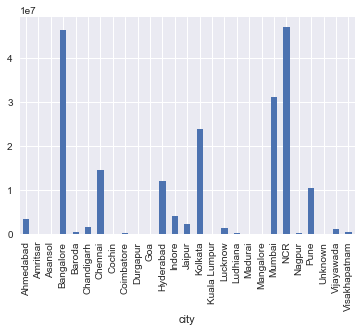

In [24]:
ax.set_title('age distribution')
ax.set_xlabel('age')
ax.set_ylabel('frequency')
var = train_data.groupby('city').revenue.sum()
var.plot(kind='bar')

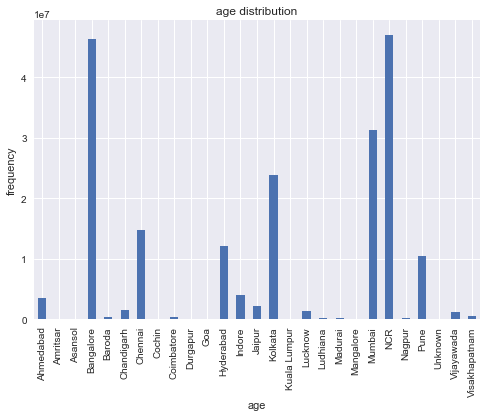

In [21]:
ax.hist(var,bins=10)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

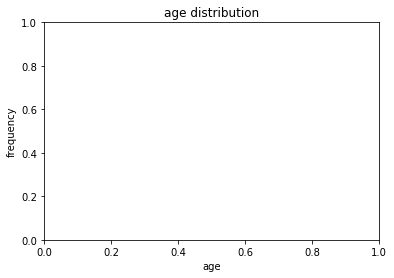

In [15]:
var = train_data.groupby('city').revenue.sum()
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
ax.boxplot(train_data['revenue'])
plt.show()

In [22]:
train_data['revenue'].plot(kind='bar', bins=100)